In [1]:
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import pandas as pd
import datetime
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
X

NameError: name 'X' is not defined

In [206]:
! pip install nba_api

  Using cached nba_api-1.1.9-py3-none-any.whl (242 kB)


Error processing line 1 of C:\Users\leona\anaconda3\lib\site-packages\google_auth-1.30.1-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\leona\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of C:\Users\leona\anaconda3\lib\site-packages\protobuf-3.15.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\leona\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


# Obtención de datos, web scraping y api_nba

In [3]:
#Abrir navegador # 
chrome_driver = r"chromedriver"
driver = webdriver.Chrome(executable_path = chrome_driver)

In [4]:
#Acceder a la página y guardar soup
url = "https://www.nba.com/?0"
driver.get(url) 
response = requests.get(url)
print(bool(response))
soup = BeautifulSoup(response.text, "html.parser") #En la variable soup voy a tener toda la página web en html

True


In [5]:
#Intenta acceder a la página si hay cookies aceptarlas
sleep(randint(2,4))
try:
    sleep(randint(2,4))
    driver.find_element_by_partial_link_text('Games').click()
except:
    #driver.find_element_by_partial_link_text('Acepto').click()
    driver.find_element(By.ID, "onetrust-accept-btn-handler").click()
    
sleep(randint(2,4))
driver.find_element_by_partial_link_text('Games').click


<bound method WebElement.click of <selenium.webdriver.remote.webelement.WebElement (session="8a43c96a29af2722c2583b282e0028dc", element="6cff51fb-0ee3-4b6c-8bb2-1c20f2feeed0")>>

In [208]:
    
# Identificador de juegos
identificador=0

## A partir de aquí la función que buscará 5 partidos: recibe por parámetro la fecha y los nombres de los equipos

### Función datos_partidos

In [6]:
#team_a = "76ers".lower()
#team_b = "Hawks".lower()
#dias para ir restando


lista_dfs=[]
def datos_partidos(fecha, team_a, team_b):
    
    team_a = team_a.lower()
    team_b = team_b.lower()
    fecha = "https://www.nba.com/games?date="+fecha
    
  
    
    driver.get(fecha) #ir a games por fecha

    #Ir a Games
    sleep(randint(2,4))
    #driver.find_element(By.CSS_SELECTOR, ".NavItem_item__3UN5f:nth-child(1) span").click()# ir a games

    try:
        sleep(randint(2,4))
        element = driver.find_element(By.CSS_SELECTOR, ".w-full:nth-child(5) > .block")

        actions = ActionChains(driver)
        actions.move_to_element(element).perform()

        element = driver.find_element(By.CSS_SELECTOR, "body")
        actions = ActionChains(driver)
        driver.find_element(By.CSS_SELECTOR, ".ab-close-button path").click()
    except:
        pass



    #Obtener página actual
    soup_games = BeautifulSoup(driver.page_source)
    pagina_games = driver.current_url

    #Datos de los equipos que queremos
    sleep(randint(2,5))
 



    for i in soup_games.find_all("div", class_ = "w-full flex flex-col flex-1 md:w-7/12 lg:w-5/12"):
        if team_a.lower() in (i.find("div", class_="flex").text).lower() and team_b.lower() in (i.find("div", class_="flex").text).lower():
            et_a=i.find_all("a")
            enlace = "https://www.nba.com"+et_a[2]["href"]
            driver.get(enlace) 
            #break
            ## Guaradr datos estadísticas tradicionales y avanzadas para el dataset
            ## muere este proceseo para este día
            ## Regresar a la página anterior y seguir buscando endías anteriores
        else:
            pass



    #Obtener página actual, box score
    sleep(randint(5,7))
    soup_box_score = BeautifulSoup(driver.page_source)
    pagina_box_score = driver.current_url

    ## Datos ambos equipos

    #Columnas de df tradicional
    columnas=[]
    for i in soup_box_score.find_all("table", class_="StatsTable_table__2gqz8"):
        columnas.append(i.find("thead", class_="StatsTableHead_thead__2tFet").find_all("th"))

    columnas_tradicional=[]
    for i in columnas[0]:
        columnas_tradicional.append(i.text)

    #Cuerpos de las tablas de los dos equipos
    body_table=[]
    for i in soup_box_score.find_all("table", class_="StatsTable_table__2gqz8"):
        body_table.append(i.find("tbody", class_="StatsTableBody_tbody__2eDxB"))
    len(body_table)

    #Filas de ambos equipos
    filas_dos_equipos=[]
    for i in body_table:
        filas_dos_equipos.append(i.find_all("tr"))
    len(filas_dos_equipos)

    #Filas con los jugadores de cada equipo en la lista equipos
    fila_jugador=[]
    fila_equipo=[]
    equipos=[]
    h=0
    for k in range(len(filas_dos_equipos)):
        for j in range(len(filas_dos_equipos[h])):
            for i in filas_dos_equipos[k][j].find_all("td"):
                fila_jugador.append(i.text)
            fila_equipo.append(fila_jugador)
            fila_jugador=[]
        equipos.append(fila_equipo)
        fila_equipo=[]
        h+=1

    ## Creamos df tradicional

    df_trad = pd.DataFrame(equipos[0], columns=columnas_tradicional)
    df_trad2 = pd.DataFrame(equipos[1], columns=columnas_tradicional)


    #### Obtener nombres de los equipos

    nombres_equipo=[]
    for i in soup_box_score.find_all("span", class_="block"):
        nombres_equipo.append(i.text.lower())

    names=[]
    for i in nombres_equipo:
        if team_a in i or team_b in i:
            names.append(i)
    
            
    
    return names, df_trad, df_trad2

    

## Función df_equipos: recibe las iniciales de las ciudades de los equipos que se enfrentarán:
    Busca las 5 últimas fechas de los partidos entre los equipos que van a jugar y llama a la función datos_partidos que recibe los nombres de los equipos, las fechas y devuelve los nombres de los equipos, los data frames con las estadísticas tradicionales de los dos equipos

In [3]:
#team_a = "76ers".lower()
#team_b = "Hawks".lower()
city_a = "PHI"
city_b = "ATL"
inicio_temporada="2020-12-22"

def df_equipos(city_a, city_b, inicio_temporada):    
    nba_teams = teams.get_teams()
    # Select the dictionary for the Celtics, which contains their team ID
    celtics = [team for team in nba_teams if team['abbreviation'] == city_a][0]
    celtics_id = celtics['id']

    # Query for games where the Celtics were playing
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
    # The first DataFrame of those returned is what we want.
    games = gamefinder.get_data_frames()[0]
   
    games["GAME_DATE"]= games ["GAME_DATE"].astype("datetime64")#Convertimos en formato fecha el game_date
    games_temporada = games[games["GAME_DATE"]>=inicio_temporada]#Escoger los partidos dentro de la temporada
    #Filtrar por la ciudad rival
    games_temporada = games_temporada[games_temporada["MATCHUP"].isin([city_a+" @ "+city_b, city_a+" vs. "+city_b])].sort_values("GAME_DATE",ascending=False)
    
    #reiniciar index
    games_temporada = games_temporada.reset_index()
    games_temporada.drop("index", axis=1, inplace=True)

    games_temporada["GAME_DATE"] = games_temporada["GAME_DATE"].map(lambda x: x.strftime("%Y-%m-%d"))#Cambiamos fecha a str
    fechas_partidos = games_temporada["GAME_DATE"].values
    
    #Encontrar en nombre del equipo rival
    for i in range(len(nba_teams)):
            if games_temporada["MATCHUP"][0].split()[2]== nba_teams[i]["abbreviation"]:
                name_adversario = nba_teams[i]["full_name"]

    team_b = name_adversario.split()[-1]    
    team_a = games_temporada["TEAM_NAME"][0].split()[-1]
    
    #Función para obtener los data frames
    for i in fechas_partidos:    
        lista_dfs.append(datos_partidos(i, team_a, team_b))
    
    return lista_dfs

In [4]:
city_a="PHX"
city_b="LAC"
inicio_temporada="2020-12-22"
nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == city_a][0]
celtics_id = celtics['id']

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]

games["GAME_DATE"]= games ["GAME_DATE"].astype("datetime64")#Convertimos en formato fecha el game_date
games_temporada = games[games["GAME_DATE"]>=inicio_temporada]#Escoger los partidos dentro de la temporada
#Filtrar por la ciudad rival
games_temporada = games_temporada[games_temporada["MATCHUP"].isin([city_a+" @ "+city_b, city_a+" vs. "+city_b])].sort_values("GAME_DATE",ascending=False)

#reiniciar index
games_temporada

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612756,PHX,Phoenix Suns,0042000313,2021-06-24,PHX @ LAC,L,240,92,...,0.923,11,32,43,24,5,3,10,19,-14.0
1,42020,1610612756,PHX,Phoenix Suns,0042000312,2021-06-22,PHX vs. LAC,W,239,104,...,0.889,7,32,39,24,5,3,9,20,1.0
2,42020,1610612756,PHX,Phoenix Suns,0042000311,2021-06-20,PHX vs. LAC,W,240,120,...,1.000,7,36,43,31,5,3,7,16,6.0
23,22020,1610612756,PHX,Phoenix Suns,0022000941,2021-04-28,PHX vs. LAC,W,240,109,...,0.769,15,30,45,23,9,4,10,11,8.0
34,22020,1610612756,PHX,Phoenix Suns,0022000788,2021-04-08,PHX @ LAC,L,239,103,...,0.833,9,27,36,20,6,6,14,18,-10.0
78,22020,1610612756,PHX,Phoenix Suns,0022000091,2021-01-03,PHX vs. LAC,L,240,107,...,0.821,7,33,40,23,4,3,13,22,-5.0


In [5]:
city_a="LAC"
city_b="PHX"
inicio_temporada="2020-12-22"
nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == city_a][0]
celtics_id = celtics['id']

# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]

games["GAME_DATE"]= games ["GAME_DATE"].astype("datetime64")#Convertimos en formato fecha el game_date
games_temporada = games[games["GAME_DATE"]>=inicio_temporada]#Escoger los partidos dentro de la temporada
#Filtrar por la ciudad rival
games_temporada = games_temporada[games_temporada["MATCHUP"].isin([city_a+" @ "+city_b, city_a+" vs. "+city_b])].sort_values("GAME_DATE",ascending=False)

#reiniciar index
games_temporada

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42020,1610612746,LAC,LA Clippers,0042000313,2021-06-24,LAC vs. PHX,W,244,106,...,0.833,10,41,51,20,8,5,11,15,14.0
1,42020,1610612746,LAC,LA Clippers,0042000312,2021-06-22,LAC @ PHX,L,240,103,...,0.750,7,32,39,18,3,4,8,19,-1.0
2,42020,1610612746,LAC,LA Clippers,0042000311,2021-06-20,LAC @ PHX,L,239,114,...,0.824,10,29,39,23,6,3,9,17,-6.0
24,22020,1610612746,LAC,LA Clippers,0022000941,2021-04-28,LAC @ PHX,L,241,101,...,0.778,5,31,36,24,8,0,14,16,-8.0
35,22020,1610612746,LAC,LA Clippers,0022000788,2021-04-08,LAC vs. PHX,W,240,113,...,0.917,9,26,35,26,5,1,10,22,10.0
81,22020,1610612746,LAC,LA Clippers,0022000091,2021-01-03,LAC @ PHX,W,241,112,...,0.789,8,29,37,24,5,2,10,22,5.0


### En datos_tradicional se guardan los nombres y dataframes tradicionales de los dos equipos, en sus últimos 5 encuentros

In [336]:
datos_tradicional=[]
lista_dfs=[]
city_a="PHX"
city_b="DEN"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)

In [337]:
len(datos_tradicional)

7

## Procesamiento de los datos tradicionales. Devuelve un df con las medias de los jugadores, de los encuentros de la temporada actual

In [8]:
def procesamiento_tradicional():    
    ### Agregar la columna team_name a los data frames de los partidos de la temporada
    for j in range(len(datos_tradicional)):
        for i in range(1,3):
            datos_tradicional[j][i]["team_name"]=datos_tradicional[j][0][i-1]


    ## Concatenar data frames, df contiene los datos de los últimos 5 partidos entre dos equipos

    df = pd.DataFrame(columns=datos_tradicional[0][1].columns)
    for i in range(len(datos_tradicional)):
        for j in range(1,3):
            df = pd.concat([df, datos_tradicional[i][j]])
    df = df.reset_index()
    df.drop("index", axis=1, inplace=True)

    ### ELiminar filas nan, corresponden a jugadores que no jugaron
    ### ELiminar nans, 
    df2 = df.copy()
    df2.dropna(axis=0, inplace = True) #Si la fila tiene al menos 5 no-NaN se mantiene

    #Eliminar las filas totals
    df2 = df2.drop(df2[df2["PLAYER"] == "TOTALS"].index)

    ### Cambiamos el tipo de dato a float64
    def minutos(x):
        tiempo=[]
        for i in range(2):
            tiempo.append(int(x.split(":")[i]))
        return (tiempo[1]/60)+tiempo[0]

    df2["MIN"] = df2["MIN"].apply(minutos)
    df2.iloc[:, 2:-1] = df2.iloc[:, 2:-1].astype("float64")

    ### Crear columna team_id
    def id_team(x):
        if x == df2["team_name"].unique()[0]:
            return 1
        else:
            return 2
    #df2["team_name"].unique()[1]

    df2["team_id"] = df2["team_name"].apply(id_team)
    #Crear columna local-visitante

    def local_visitante_trad(x):
        if x == df2["team_name"].unique()[0]:
            return "V"
        else:
            return "L"
    df2["local_visitante"] = df2["team_name"].apply(local_visitante_trad)



    ### Reiniciar índice
    df = df.reset_index()

    # Quitar la última letra mayúscula del nombre del jugador, porque es la posición en que juega
    df2 = df2.reset_index()
    df2.drop("index", axis=1, inplace=True)
    for i in range(len(df2["PLAYER"])):
        if df2["PLAYER"][i][-1].isupper():
            df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])

    ### En df_medias_jugadores están resuumidos, por la media, los atributos de cada jugador, de los últimos 5 encuentros, entre los equipos que estamos estudiando
    df_medias_jugadores = df2.groupby("PLAYER").mean()

    return df2, df_medias_jugadores

## Obtener etadísticas avanzadas

In [9]:
#team_a = "76ers".lower()
#team_b = "Hawks".lower()
#dias para ir restando


lista_dfs_avanzadas=[]
def est_avanzadas(fecha, team_a, team_b):
    
    team_a = team_a.lower()
    team_b = team_b.lower()
    fecha = "https://www.nba.com/games?date="+fecha
    
  
    
    driver.get(fecha) #ir a games por fecha

    #Ir a Games
    sleep(randint(2,4))
    #driver.find_element(By.CSS_SELECTOR, ".NavItem_item__3UN5f:nth-child(1) span").click()# ir a games
    
    #Quitar ventanas emergentes
    try:
        sleep(randint(2,4))
        element = driver.find_element(By.CSS_SELECTOR, ".w-full:nth-child(5) > .block")

        actions = ActionChains(driver)
        actions.move_to_element(element).perform()

        element = driver.find_element(By.CSS_SELECTOR, "body")
        actions = ActionChains(driver)
        driver.find_element(By.CSS_SELECTOR, ".ab-close-button path").click()
    except:
        pass



    #Obtener página actual
    soup_games = BeautifulSoup(driver.page_source)
    pagina_games = driver.current_url

    #Datos de los equipos que queremos
    sleep(randint(2,4))
 

    

    for i in soup_games.find_all("div", class_ = "w-full flex flex-col flex-1 md:w-7/12 lg:w-5/12"):
        if team_a.lower() in (i.find("div", class_="flex").text).lower() and team_b.lower() in (i.find("div", class_="flex").text).lower():
            et_a=i.find_all("a")
            enlace = "https://www.nba.com"+et_a[2]["href"]
            driver.get(enlace) 
            #break
            ## Guaradr datos estadísticas tradicionales y avanzadas para el dataset
            ## muere este proceseo para este día
            ## Regresar a la página anterior y seguir buscando endías anteriores
        else:
            pass
    

    ## Datos ambos equipos
    
    #Click para estadísticas avanzadas
    sleep(randint(2,4))
    #Click en estadísticas avanzadas
    driver.find_element(By.NAME, "splits").click()
    dropdown = driver.find_element(By.NAME, "splits")
    dropdown.find_element(By.XPATH, "//option[. = 'Advanced']").click()
    
    #Obtener página actual, box score
    sleep(randint(2,4))
    soup_box_score = BeautifulSoup(driver.page_source)
    pagina_box_score = driver.current_url
    
    #Columnas de df avanzadas
    columnas=[]
    for i in soup_box_score.find_all("table", class_="StatsTable_table__2gqz8"):
        columnas.append(i.find("thead", class_="StatsTableHead_thead__2tFet").find_all("th"))

    columnas_tradicional=[]
    for i in columnas[0]:
        columnas_tradicional.append(i.text)

    #Cuerpos de las tablas de los dos equipos
    body_table=[]
    for i in soup_box_score.find_all("table", class_="StatsTable_table__2gqz8"):
        body_table.append(i.find("tbody", class_="StatsTableBody_tbody__2eDxB"))
    len(body_table)

    #Filas de ambos equipos
    filas_dos_equipos=[]
    for i in body_table:
        filas_dos_equipos.append(i.find_all("tr"))
    len(filas_dos_equipos)

    #Filas con los jugadores de cada equipo en la lista equipos
    fila_jugador=[]
    fila_equipo=[]
    equipos=[]
    
    h=0
    for k in range(len(filas_dos_equipos)):
        for j in range(len(filas_dos_equipos[h])):
            for i in filas_dos_equipos[k][j].find_all("td"):
                fila_jugador.append(i.text)
            fila_equipo.append(fila_jugador)
            fila_jugador=[]
        equipos.append(fila_equipo)
        fila_equipo=[]
        h+=1


    ## Creamos df tradicional

    df_trad = pd.DataFrame(equipos[0], columns=columnas_tradicional)
    df_trad2 = pd.DataFrame(equipos[1], columns=columnas_tradicional)


    #### Obtener nombres de los equipos

    nombres_equipo=[]
    for i in soup_box_score.find_all("span", class_="block"):
        nombres_equipo.append(i.text.lower())

    names=[]
    for i in nombres_equipo:
        if team_a in i or team_b in i:
            names.append(i)
    
            
    
    return names, df_trad, df_trad2

    

In [10]:
#team_a = "76ers".lower()
#team_b = "Hawks".lower()
city_a = "PHI"
city_b = "ATL"
inicio_temporada="2020-12-22"

def df_equipos_avanzadas(city_a, city_b, inicio_temporada):    
    nba_teams = teams.get_teams()
    # Select the dictionary for the Celtics, which contains their team ID
    celtics = [team for team in nba_teams if team['abbreviation'] == city_a][0]
    celtics_id = celtics['id']

    # Query for games where the Celtics were playing
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
    # The first DataFrame of those returned is what we want.
    games = gamefinder.get_data_frames()[0]
   
    games["GAME_DATE"]= games ["GAME_DATE"].astype("datetime64")#Convertimos en formato fecha el game_date
    games_temporada = games[games["GAME_DATE"]>=inicio_temporada]#Escoger los partidos dentro de la temporada
    #Filtrar por la ciudad rival
    games_temporada = games_temporada[games_temporada["MATCHUP"].isin([city_a+" @ "+city_b, city_a+" vs. "+city_b])].sort_values("GAME_DATE",ascending=False)
    
    #reiniciar index
    games_temporada = games_temporada.reset_index()
    games_temporada.drop("index", axis=1, inplace=True)

    games_temporada["GAME_DATE"] = games_temporada["GAME_DATE"].map(lambda x: x.strftime("%Y-%m-%d"))#Cambiamos fecha a str
    fechas_partidos = games_temporada["GAME_DATE"].values
    
    #Encontrar en nombre del equipo rival
    for i in range(len(nba_teams)):
            if games_temporada["MATCHUP"][0].split()[2]== nba_teams[i]["abbreviation"]:
                name_adversario = nba_teams[i]["full_name"]

    team_b = name_adversario.split()[-1]    
    team_a = games_temporada["TEAM_NAME"][0].split()[-1]
    
    #Función para obtener los data frames
    for i in fechas_partidos:    
        lista_dfs_avanzadas.append(est_avanzadas(i, team_a, team_b))
    
    return lista_dfs_avanzadas

### En result_avanzadas se guardan los nombres y estadísticas avanzadas, de los 2 equipos de los últimos 5 encuentros

In [342]:
lista_dfs_avanzadas=[]
result_avanzadas=[]
city_a="PHX"
city_b="DEN"
result_avanzadas = df_equipos_avanzadas(city_a, city_b, inicio_temporada )

In [148]:
result_avanzadas[0][0]
len(result_avanzadas)

8

### Procesamiento de datos de estadísticas avanzadas

In [11]:
def procesamiento_avanzadas():
    for j in range(len(result_avanzadas)):
        for i in range(1,3):
            result_avanzadas[j][i]["team_name"]=result_avanzadas[j][0][i-1]

    ## Concatenar data frames, df contiene los datos de los últimos 5 partidos entre dos equipos


    df_avanzadas = pd.DataFrame(columns=result_avanzadas[0][1].columns)
    for i in range(len(result_avanzadas)):
        for j in range(1,3):
            df_avanzadas = pd.concat([df_avanzadas, result_avanzadas[i][j]])
    df_avanzadas = df_avanzadas.reset_index()
    df_avanzadas.drop("index", axis=1, inplace=True)

    ### ELiminar filas nan, corresponden a jugadores que no jugaron
    df_avanzadas[df_avanzadas["OFFRTG"].isnull()].head(2)

    ### ELiminar nans, y las filas totals

    df2_avanzadas = df_avanzadas.copy()
    df2_avanzadas.dropna(axis=0, inplace = True) #Si la fila tiene al menos 5 no-NaN se mantiene
    df2_avanzadas.shape

    df2_avanzadas = df2_avanzadas.drop(df2_avanzadas[df2_avanzadas["PLAYER"] == "TOTALS"].index)

    ### Cambiamos el tipo de dato a float64

    def minutos_avanzadas(x):
        tiempo=[]
        for i in range(2):
            tiempo.append(int(x.split(":")[i]))
        return (tiempo[1]/60)+tiempo[0]
    df2_avanzadas["MIN"] = df2_avanzadas["MIN"].apply(minutos_avanzadas)
    df2_avanzadas.iloc[:, 2:-1] = df2_avanzadas.iloc[:, 2:-1].astype("float64")

    ### Crear columna team_id

    def id_team_avanzadas(x):
        if x == df2_avanzadas["team_name"].unique()[0]:
            return 1
        else:
            return 2
    df2_avanzadas["team_id"] = df2_avanzadas["team_name"].apply(id_team_avanzadas)
    #df2["team_name"].unique()[1]

    #Crear columna local-visitante
    def local_visitante(x):
        if x == df2_avanzadas["team_name"].unique()[0]:
            return "V"
        else:
            return "L"
    df2_avanzadas["local_visitante"] = df2_avanzadas["team_name"].apply(local_visitante)



    ### Reiniciar índice
    df2_avanzadas = df2_avanzadas.reset_index()
    df2_avanzadas.drop("index", axis=1, inplace=True)

    # Quitar la última letra mayúscula del nombre del jugador, porque es la posición en que juega

    for i in range(len(df2_avanzadas["PLAYER"])):
        if df2_avanzadas["PLAYER"][i][-1].isupper():
            df2_avanzadas["PLAYER"][i] = (df2_avanzadas["PLAYER"][i][:-1])

    # Agregar un game_id
    #df2_avanzadas["game_id"]=identificador
    #identificador+=1
    
    
    ### En df_medias_jugadores están resuumidos, por la media, los atributos de cada jugador, de los últimos 5 encuentros, entre los equipos que estamos estudiando
    df_medias_avanzadas = df2_avanzadas.groupby("PLAYER").mean()

    return df2_avanzadas, df_medias_avanzadas

In [347]:
len(df_medias_avanzadas.head())

5

## EDA, estadísticas tradicionales

### Crear indice de tiros intentados / PTS. FGA/PTS
### Crear indice  PTS / MIN

### BOS VS BKN
Victorias:
7 BKN/ 
1 BOS

In [65]:
datos_tradicional=[]
lista_dfs=[]
city_a="BOS"
city_b="BKN"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

<ipython-input-7-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


In [34]:
variables_scatter=["FGA", "FG%", "3PA", "3P%", "DREB", "REB", "AST", "STL", "TO", "PF", "MIN"]

boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
FGA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


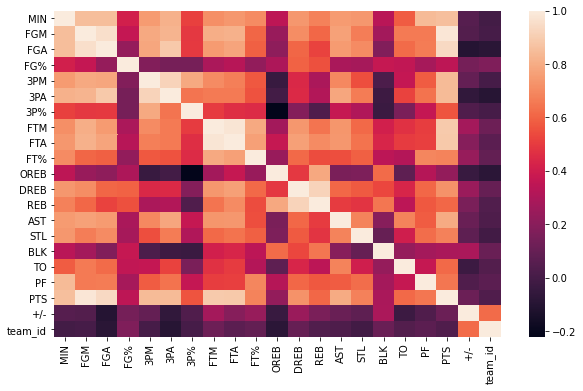

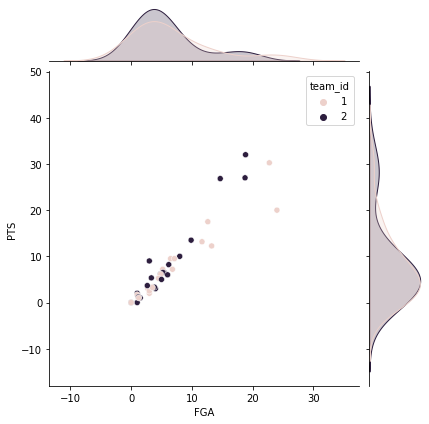



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
FG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


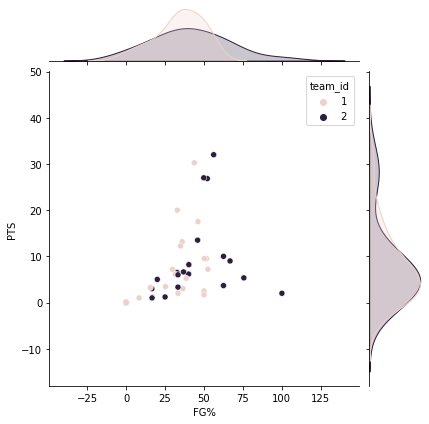



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
3PA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


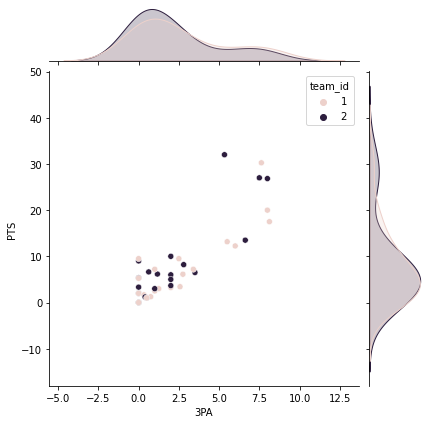



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
3P%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


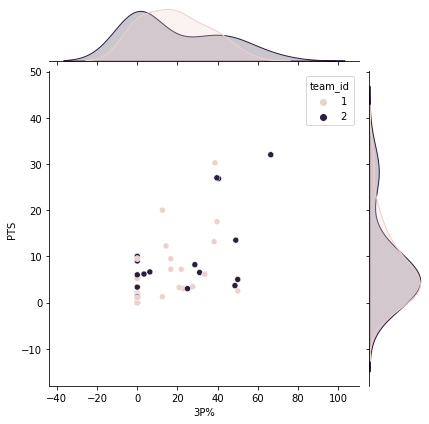



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
DREB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


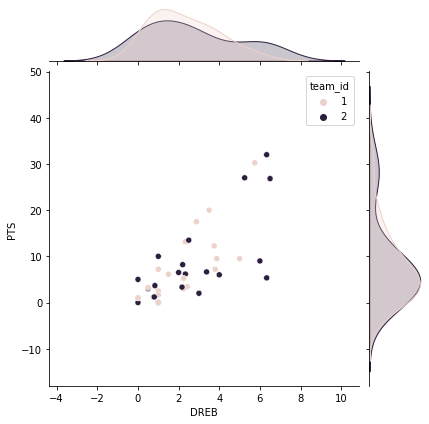



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
REB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


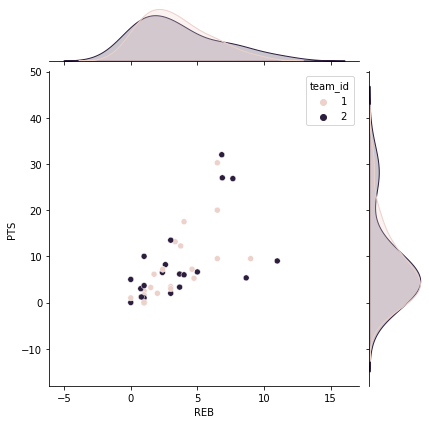



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
AST  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


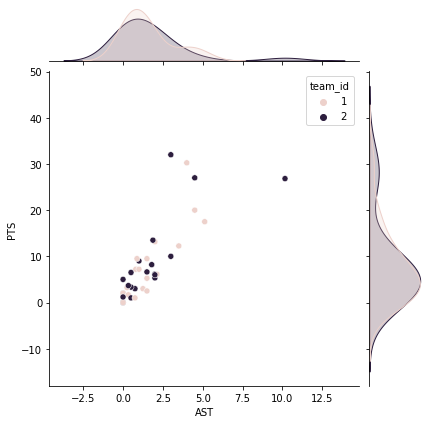



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
STL  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


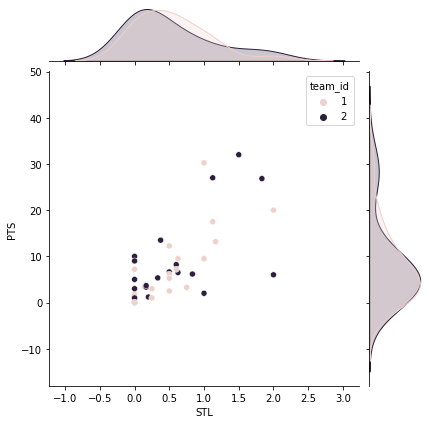



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


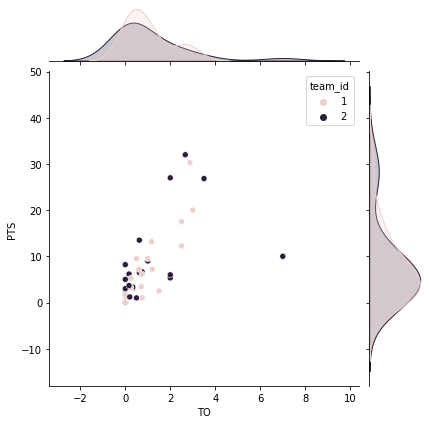



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
PF  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


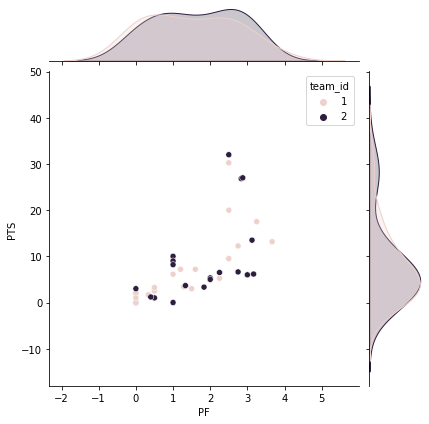



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
MIN  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


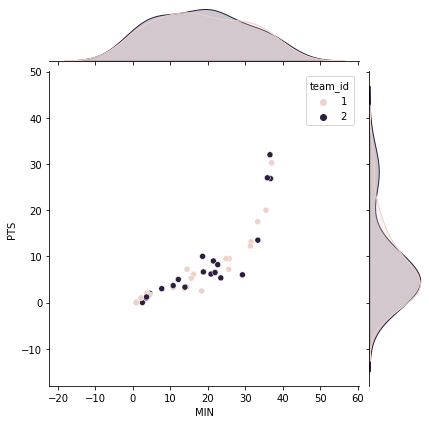

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_tradicionales[1].corr())

for i in variables_scatter:
    print(datos_tradicional[0][0][0], "Es el team_id = 1")
    print("team_2: 7 victorias")
    print("team_1: 1 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_tradicionales[1][i], dfs_tradicionales[1]["PTS"], hue=dfs_tradicionales[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

### MIL VS MIA

In [28]:
datos_tradicional=[]
lista_dfs=[]
city_a="MIL"
city_b="MIA"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

<ipython-input-7-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
FGA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


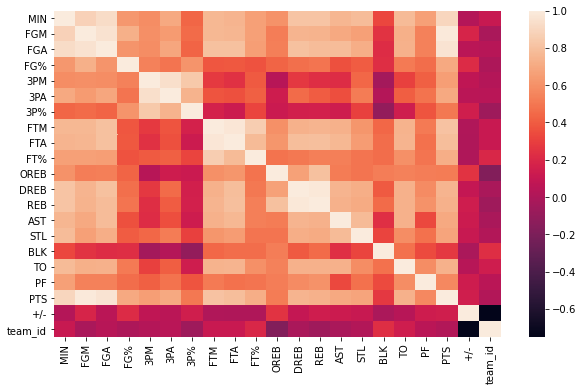

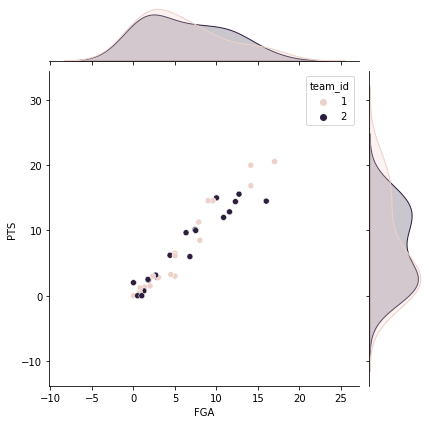



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
FG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


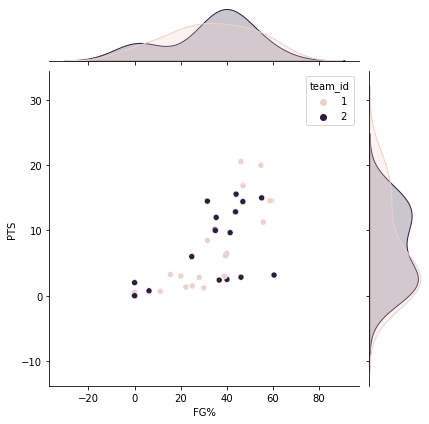



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
3PA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


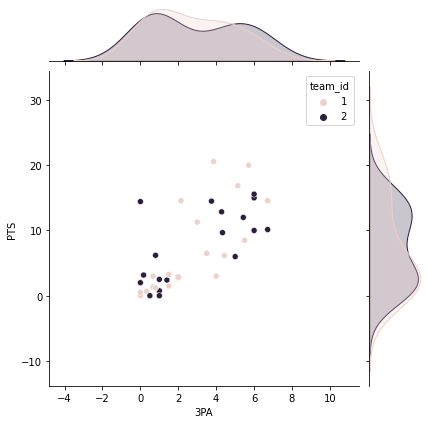



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
3P%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


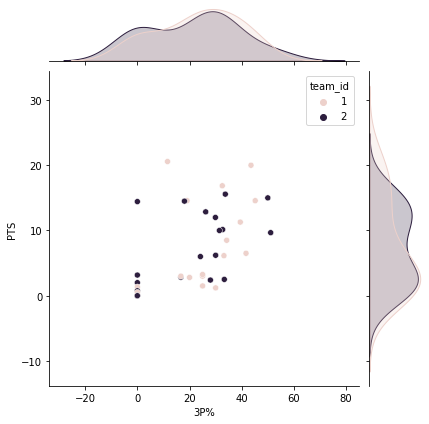



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
DREB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


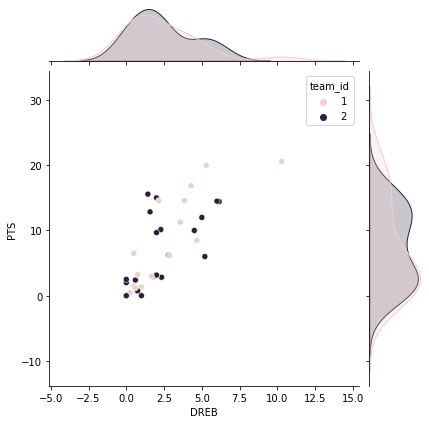



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
REB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


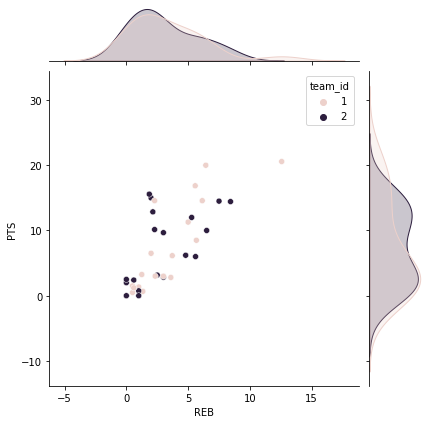



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
AST  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


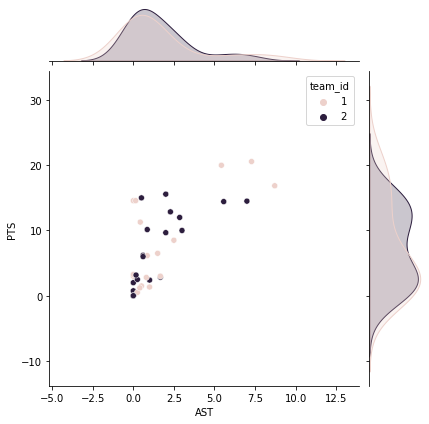



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
STL  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


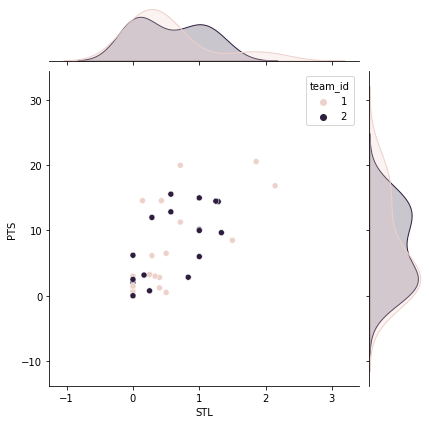



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


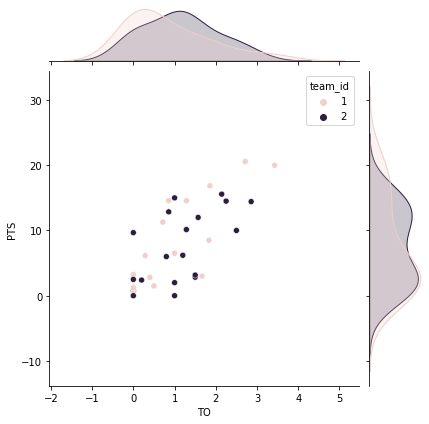



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
PF  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


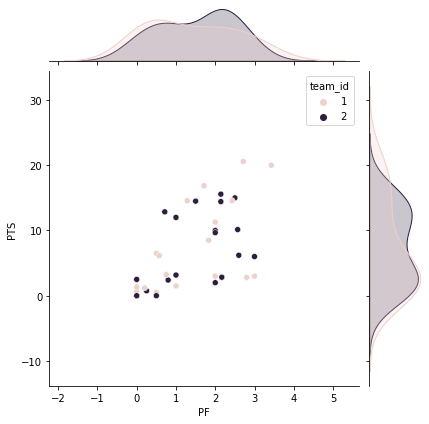



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
MIN  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


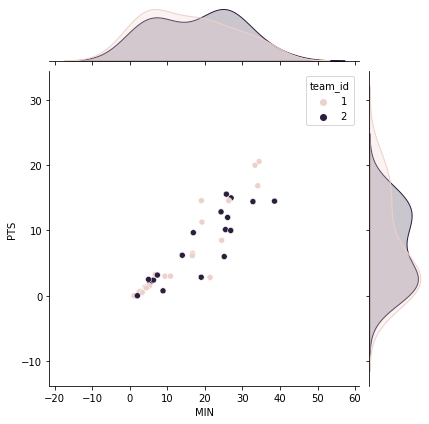

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_tradicionales[1].corr())

variables_scatter=["FGA", "FG%", "3PA", "3P%", "DREB", "REB", "AST", "STL", "TO", "PF", "MIN"]
for i in variables_scatter:
    print(datos_tradicional[0][0][0], "Es el team_id = 1")
    print("team_2: 1 victorias")
    print("team_1: 6 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_tradicionales[1][i], dfs_tradicionales[1]["PTS"], hue=dfs_tradicionales[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## PHI vs ATL

In [37]:
datos_tradicional=[]
lista_dfs=[]
city_a="PHI"
city_b="ATL"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

<ipython-input-7-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
FGA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


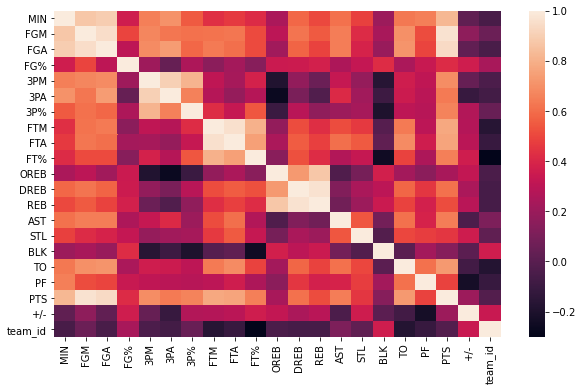

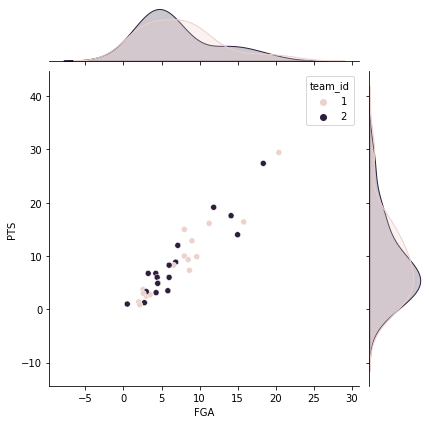



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
FG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


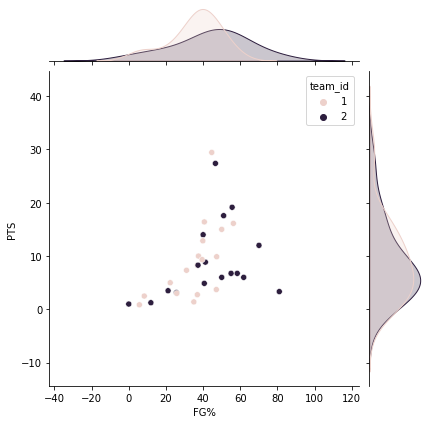



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
3PA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


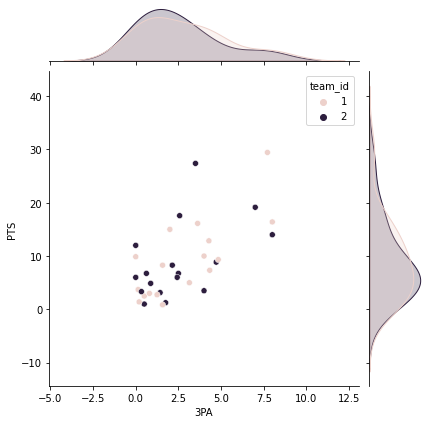



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
3P%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


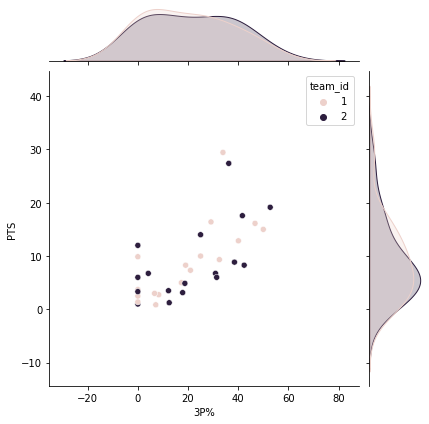



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
DREB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


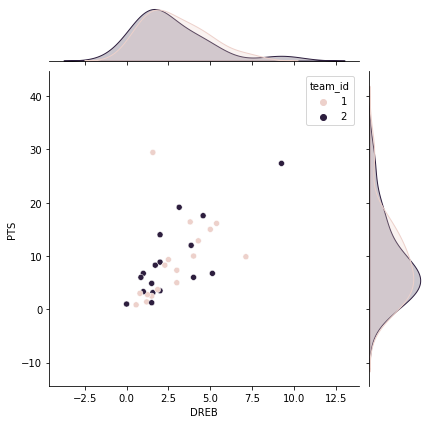



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
REB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


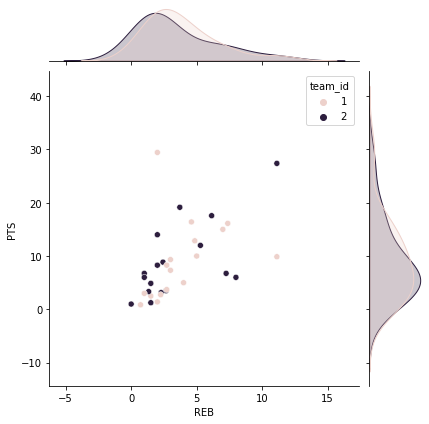



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
AST  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


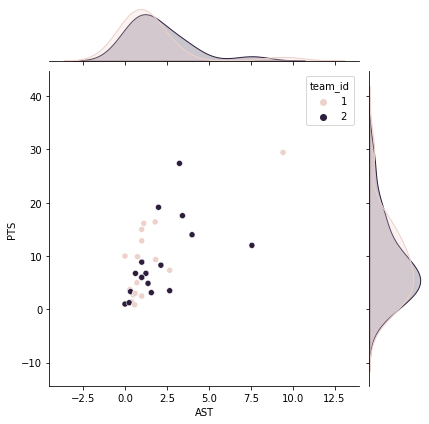



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
STL  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


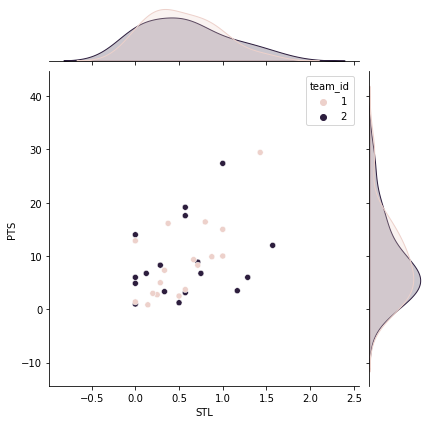



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


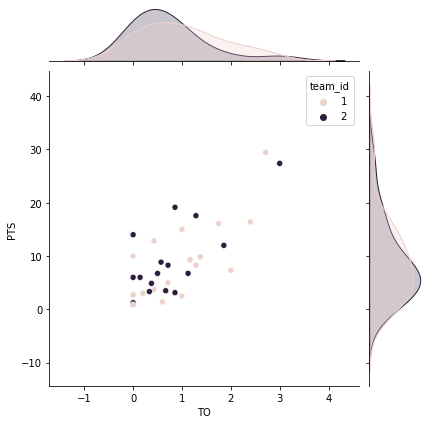



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
PF  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


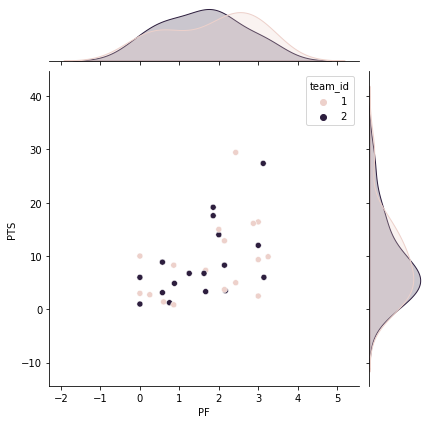



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
MIN  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


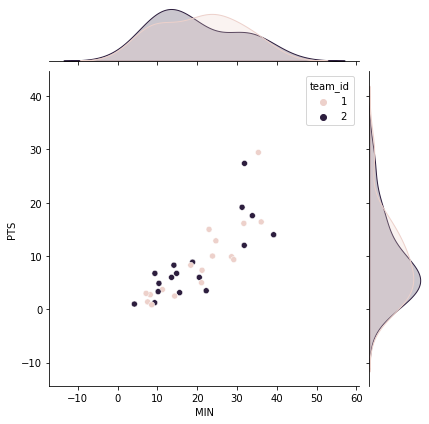



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
FT%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


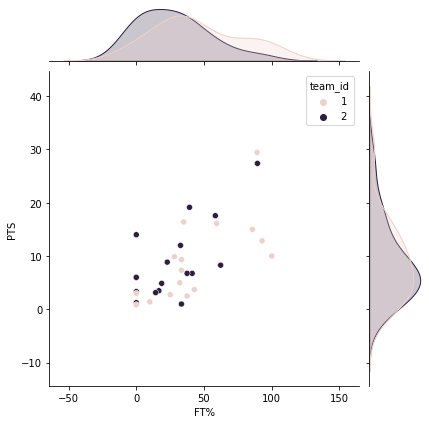

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_tradicionales[1].corr())

variables_scatter=["FGA", "FG%", "3PA", "3P%", "DREB", "REB", "AST", "STL", "TO", "PF", "MIN", "FT%"]
for i in variables_scatter:
    print(datos_tradicional[0][0][0], "Es el team_id = 1")
    print("team_2: 4 victorias")
    print("team_1: 4 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_tradicionales[1][i], dfs_tradicionales[1]["PTS"], hue=dfs_tradicionales[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## DAL VS LAC

In [40]:
datos_tradicional=[]
lista_dfs=[]
city_a="DAL"
city_b="LAC"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

<ipython-input-7-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
FGA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


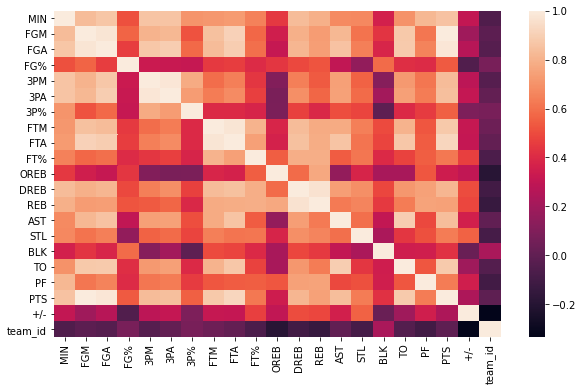

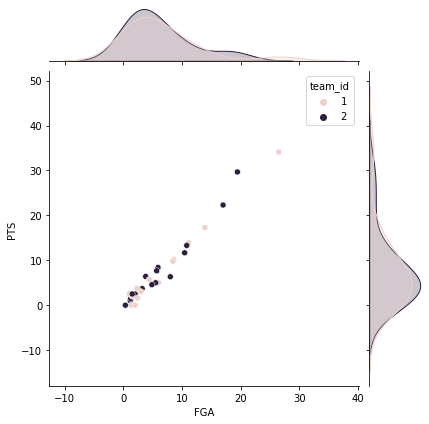



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
FG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


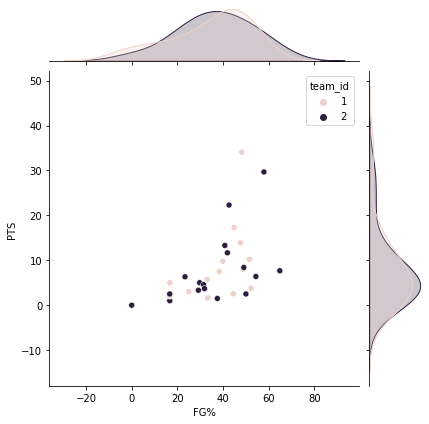



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
3PA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


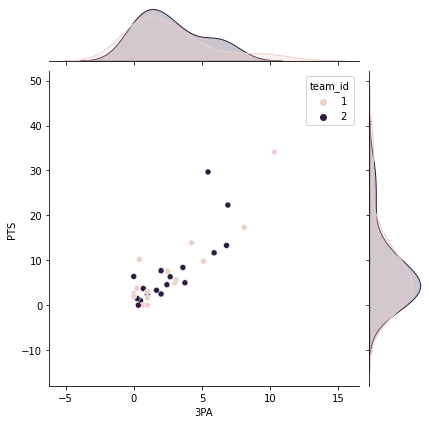



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
3P%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


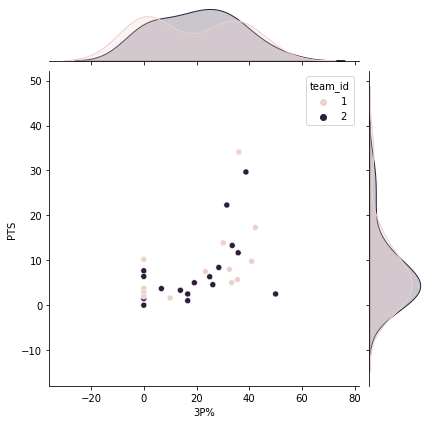



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
DREB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


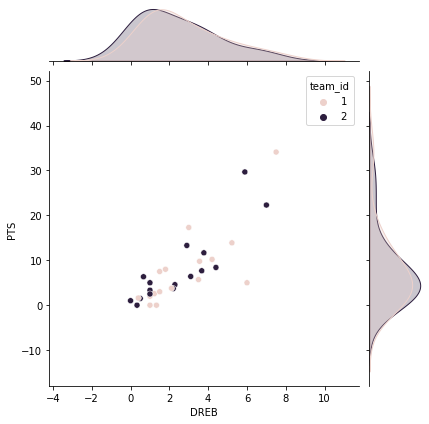



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
REB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


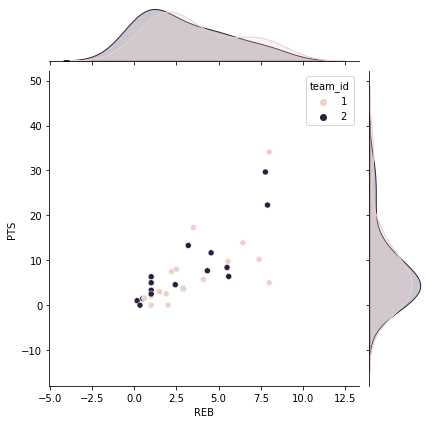



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
AST  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


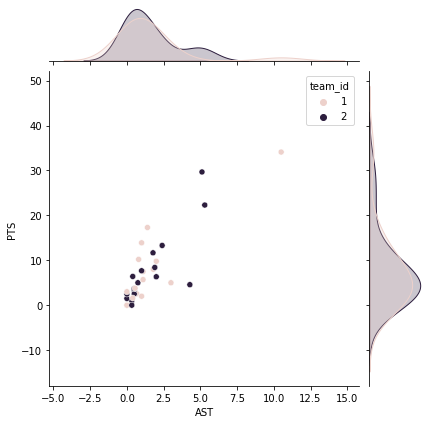



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
STL  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


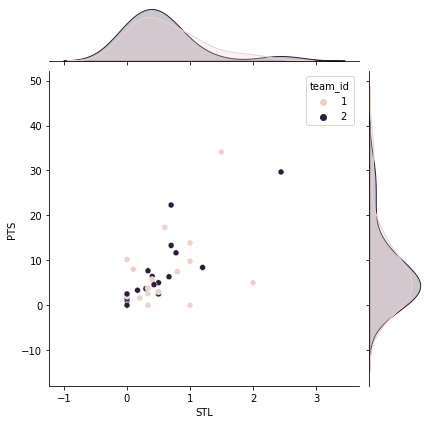



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


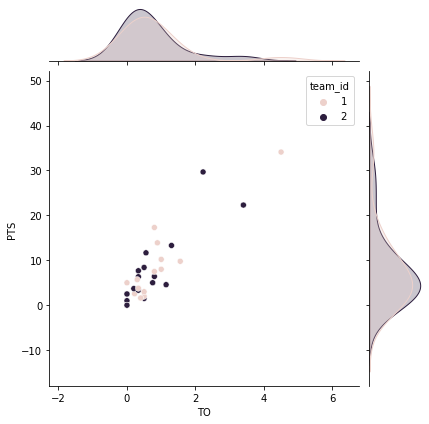



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
PF  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


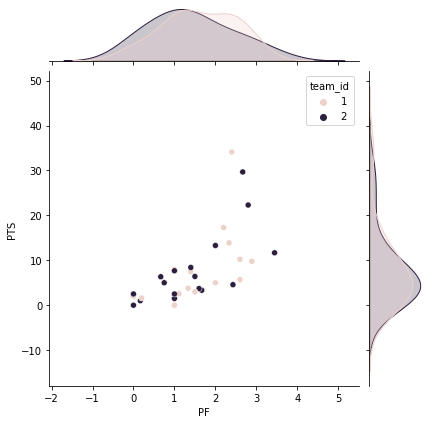



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
MIN  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


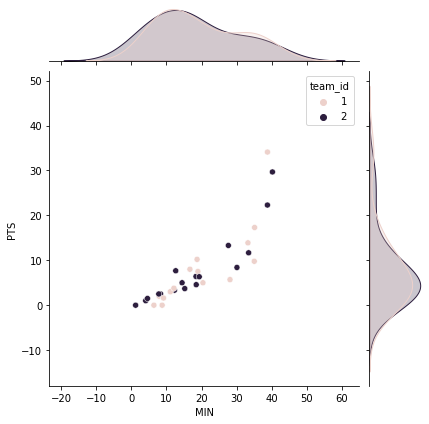



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
FT%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


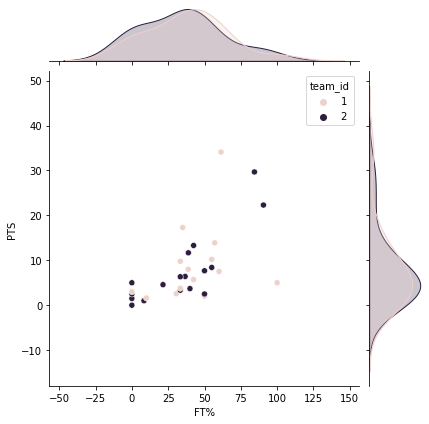

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_tradicionales[1].corr())

variables_scatter=["FGA", "FG%", "3PA", "3P%", "DREB", "REB", "AST", "STL", "TO", "PF", "MIN", "FT%"]
for i in variables_scatter:
    print(datos_tradicional[0][0][0], "Es el team_id = 1")
    print("team_2: 5 victorias")
    print("team_1: 5 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_tradicionales[1][i], dfs_tradicionales[1]["PTS"], hue=dfs_tradicionales[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## NOP vs LAL

In [42]:
datos_tradicional=[]
lista_dfs=[]
city_a="NOP"
city_b="LAL"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

<ipython-input-7-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
FGA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


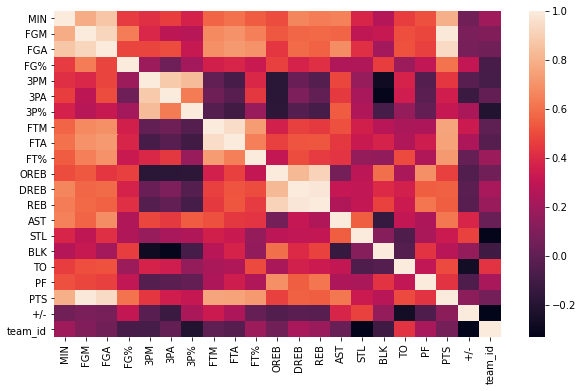

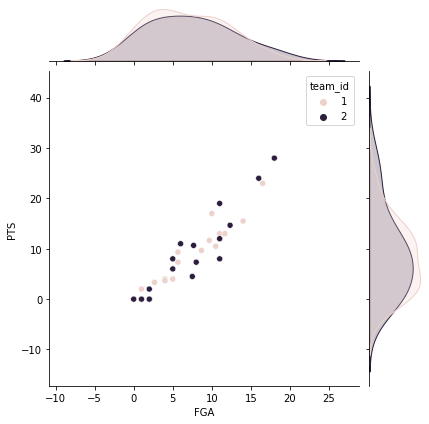



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
FG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


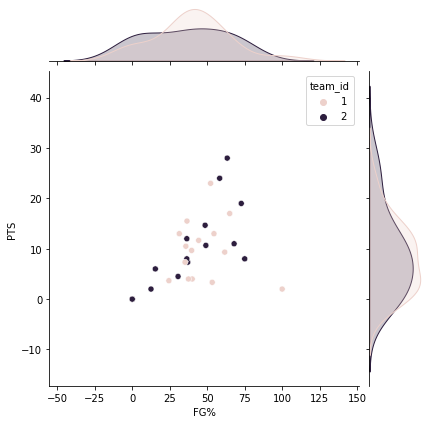



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
3PA  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


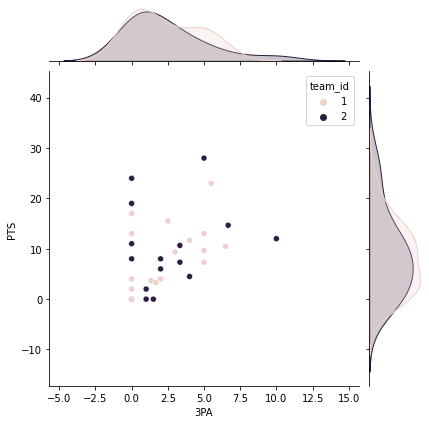



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
3P%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


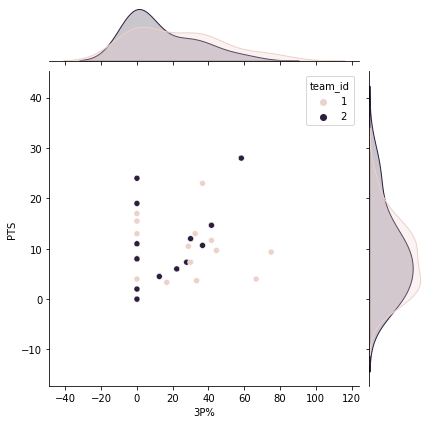



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
DREB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


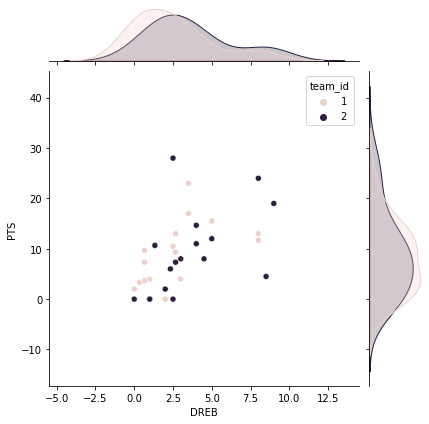



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
REB  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


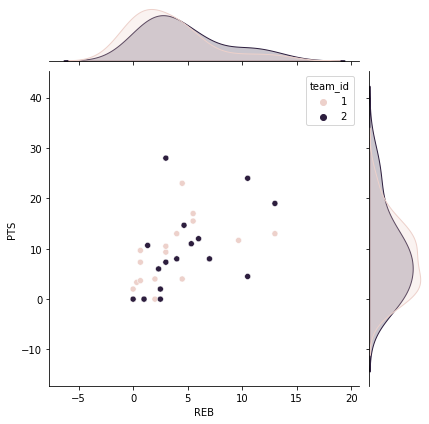



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
AST  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


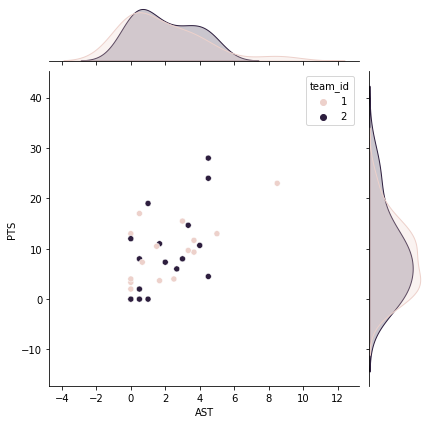



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
STL  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


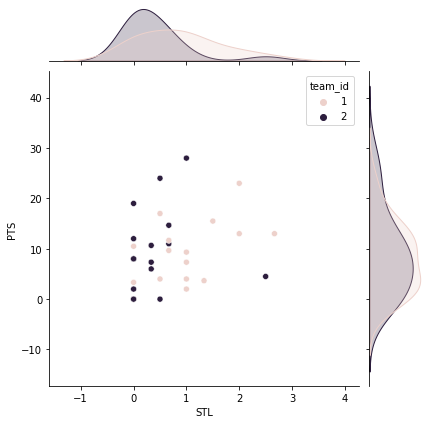



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


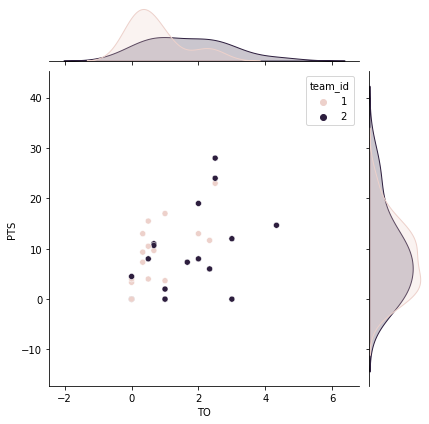



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
PF  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


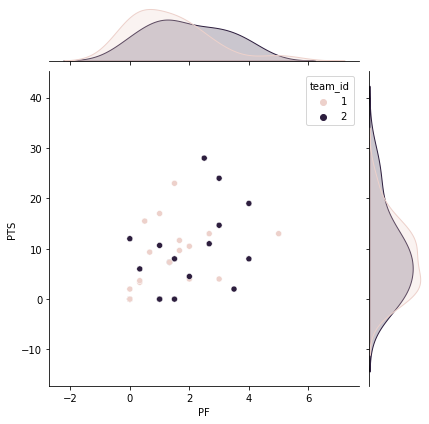



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
MIN  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


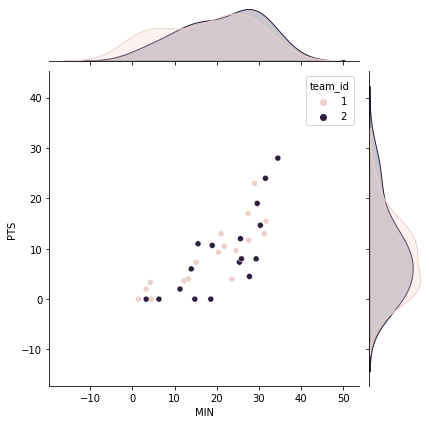



los angeles lakers Es el team_id = 1
team_2: 1 victorias
team_1: 2 victorias
FT%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


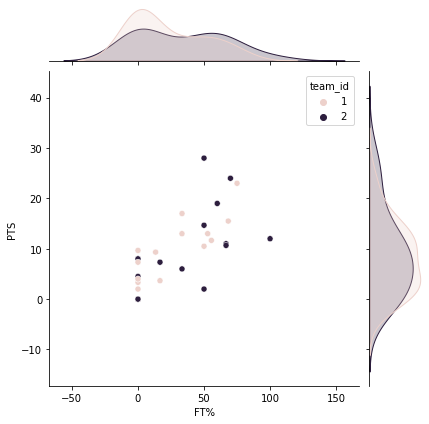

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_tradicionales[1].corr())

variables_scatter=["FGA", "FG%", "3PA", "3P%", "DREB", "REB", "AST", "STL", "TO", "PF", "MIN", "FT%"]
for i in variables_scatter:
    print(datos_tradicional[0][0][0], "Es el team_id = 1")
    print("team_2: 1 victorias")
    print("team_1: 2 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_tradicionales[1][i], dfs_tradicionales[1]["PTS"], hue=dfs_tradicionales[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

In [46]:
dfs_tradicionales[0].groupby("team_id").sum()

,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,+/-
team_id,,,,,,,,,,,,,,,,,,,,
1,720.000000,120.0,274.0,1518.2,44.0,109.0,1085.0,49.0,71.0,901.7,27.0,93.0,120.0,86.0,35.0,15.0,28.0,49.0,333.0,60.0
2,720.016667,125.0,254.0,1279.0,28.0,83.0,556.7,43.0,55.0,1200.0,29.0,118.0,147.0,76.0,16.0,13.0,54.0,63.0,321.0,-60.0


## Conclusiones estadísticas tradicionales:
- FGA, 3PA están directamente relacionadas con la cantidad de puntos anotados.
- En equipos con número de victorias y derrotas similares, la efectividad en tiros libres y FGA son determinantes.
- EN equipos con diferencia grande entre victorias y derrotas son más importantes las variables DREB, REB, AST, STL, TO
- FG%, 3p%, DREB podría definir equipos, en equipos con número de victorias y derrotas similares
- Cuando se resumen las caractrísticas de los jugadores por la media la correlación con los puntos es más clara.
- La correlación entre puntos y rebotes defensivos, rebotes, robos, pérdidas, asistencias, aunque menor que la de los tiros     intentados se mantiene en los partidos resumiendo las caractrísticas de los jugadores por la media


# EDA, estadísticas avanzadas

### BOS VS BKN
Victorias:
7 BKN/ 
1 BOS

In [201]:
lista_dfs_avanzadas=[]
result_avanzadas=[]
city_a="BOS"
city_b="BKN"
inicio_temporada="2020-12-22"
result_avanzadas = df_equipos_avanzadas(city_a, city_b, inicio_temporada )
dfs_avanzados = procesamiento_avanzadas()

# Agregar pts a estadísticas avanzadas
dfs_avanzados[1]["Puntos"]=dfs_tradicionales[1]["PTS"].values

<ipython-input-193-9aabaec0fba5>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_avanzadas["PLAYER"][i] = (df2_avanzadas["PLAYER"][i][:-1])


<AxesSubplot:>

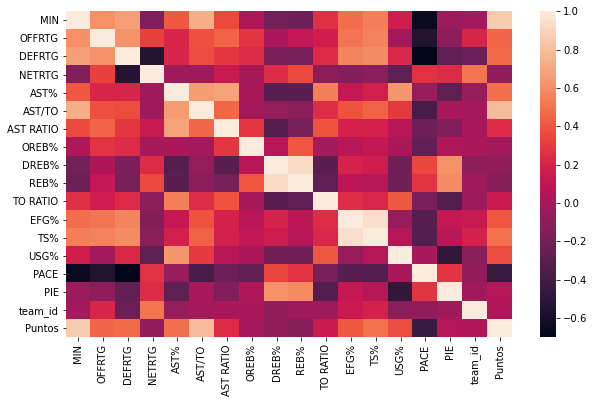

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_avanzados[1].corr())

In [184]:
dfs_avanzados[1].columns

Index(['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO',
       'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%', 'USG%', 'PACE',
       'PIE', 'team_id', 'Puntos'],
      dtype='object')

boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
OFFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


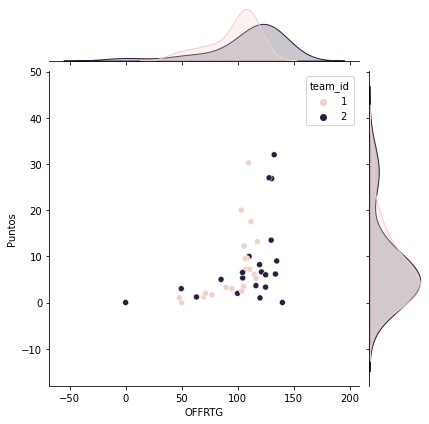



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
DEFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


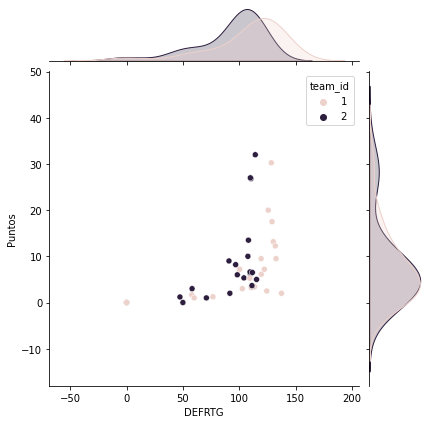



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
AST%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


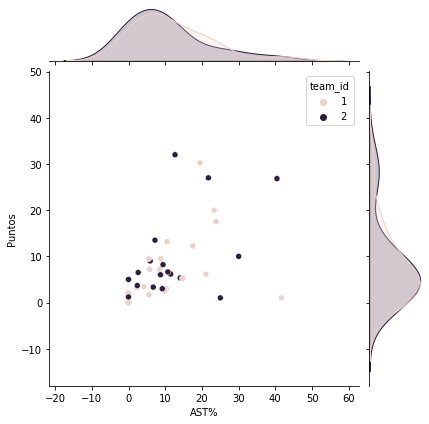



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
AST/TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


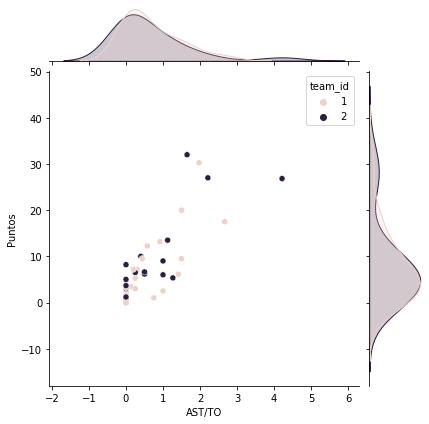



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
EFG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


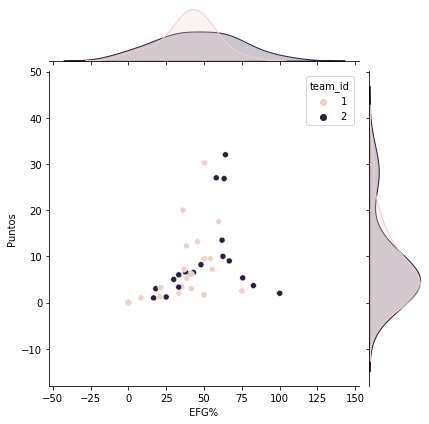



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
TS%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


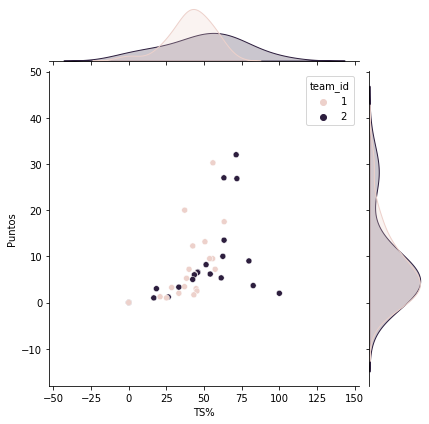



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
USG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


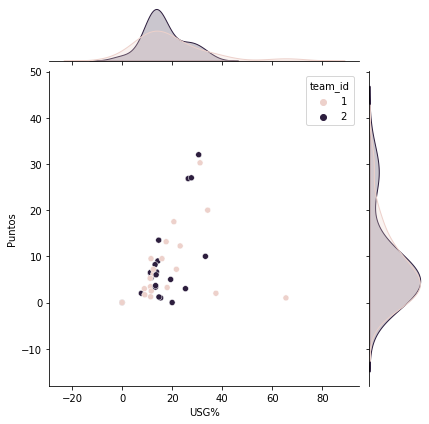



boston celtics Es el team_id = 1
team_2: 7 victorias
team_1: 1 victorias
DREB%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


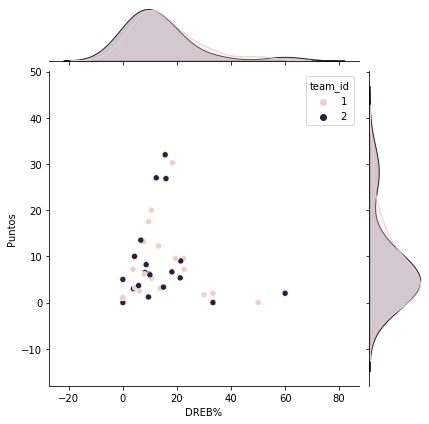

In [187]:
variables_scatter_avanzadas=["OFFRTG",  'DEFRTG', 'AST%', 'AST/TO', 'EFG%', 'TS%', 'USG%', 'DREB%']

for i in variables_scatter_avanzadas:
    print(result_avanzadas[0][0][0], "Es el team_id = 1")
    print("team_2: 7 victorias")
    print("team_1: 1 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_avanzados[1][i], dfs_avanzados[1]["Puntos"], hue=dfs_avanzados[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

boston celtics Es el team_id = 1
OFFRTG


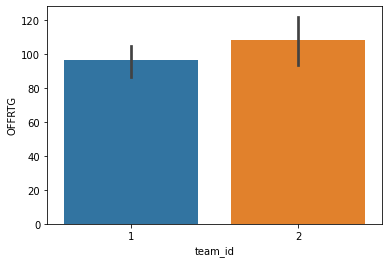

boston celtics Es el team_id = 1
DEFRTG


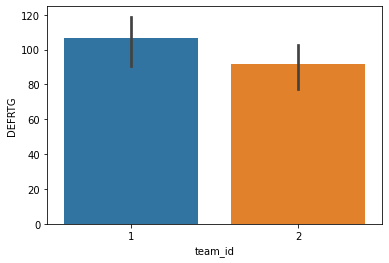

boston celtics Es el team_id = 1
AST%


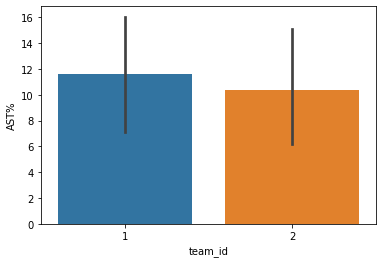

boston celtics Es el team_id = 1
AST/TO


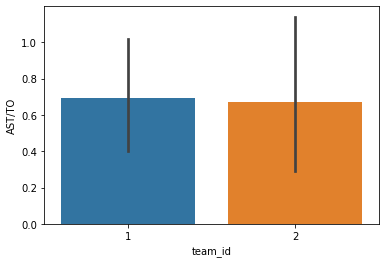

boston celtics Es el team_id = 1
EFG%


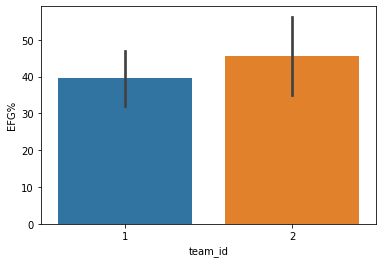

boston celtics Es el team_id = 1
TS%


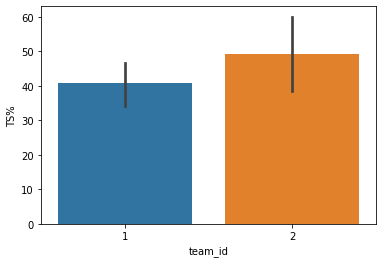

boston celtics Es el team_id = 1
USG%


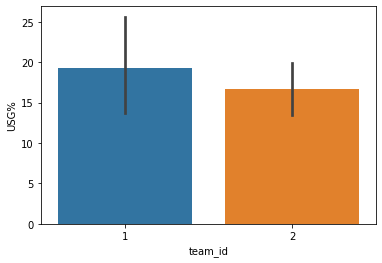

boston celtics Es el team_id = 1
DREB%


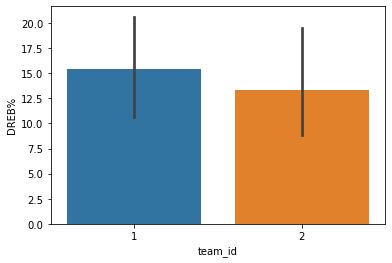

In [190]:
for i in variables_scatter_avanzadas:     
    print(result_avanzadas[0][0][0], "Es el team_id = 1")
    print(i )
    sns.barplot(x="team_id", y=i, data=dfs_avanzados[1]) #Muestra el promedio del precio del tipo de habitación
    plt.show()


### MIL VS MIA

In [222]:
lista_dfs_avanzadas=[]
result_avanzadas=[]
city_a="MIL"
city_b="MIA"
inicio_temporada="2020-12-22"
result_avanzadas = df_equipos_avanzadas(city_a, city_b, inicio_temporada )
dfs_avanzados = procesamiento_avanzadas()

datos_tradicional=[]
lista_dfs=[]
city_a="MIL"
city_b="MIA"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

# Agregar pts a estadísticas avanzadas
dfs_avanzados[1]["Puntos"]=dfs_tradicionales[1]["PTS"].values

<ipython-input-221-8b9da228636e>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_avanzadas["PLAYER"][i] = (df2_avanzadas["PLAYER"][i][:-1])
<ipython-input-204-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


<AxesSubplot:>

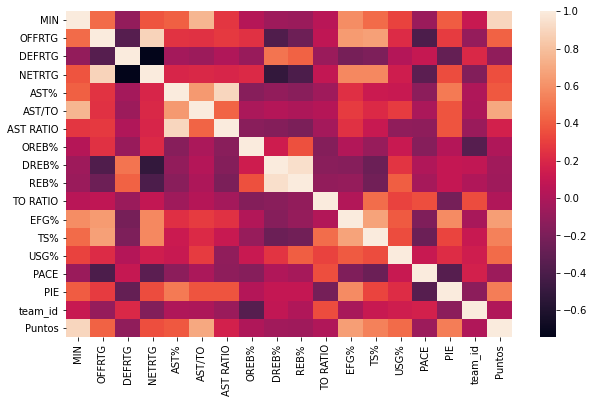

In [225]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_avanzados[1].corr())

milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
OFFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


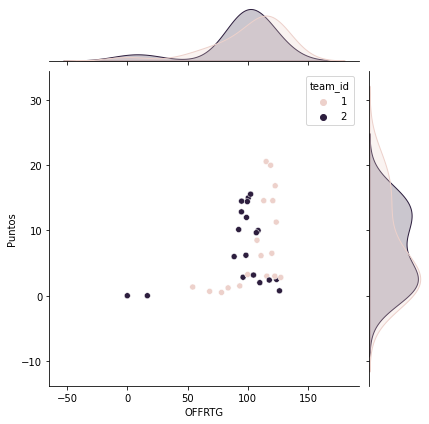



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
DEFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


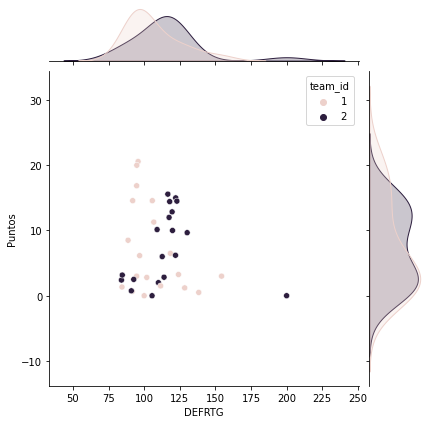



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
AST%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


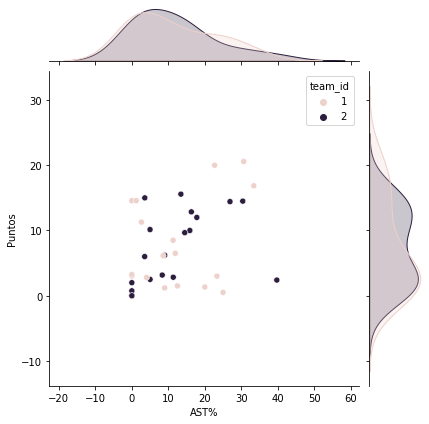



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
AST/TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


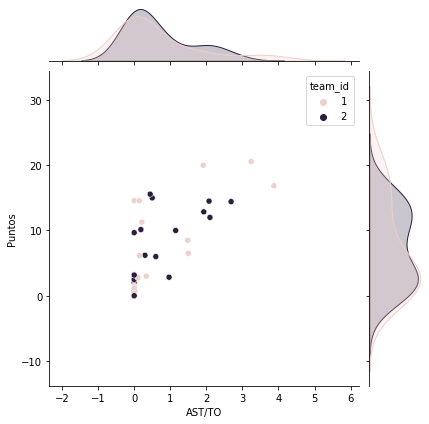



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
EFG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


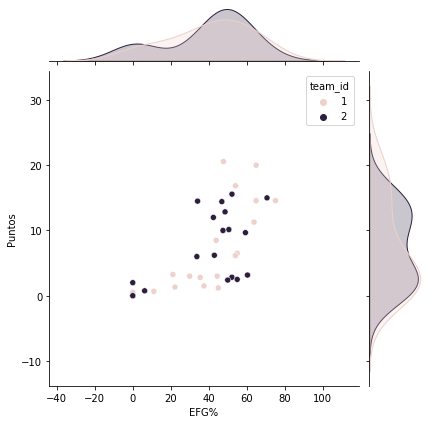



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
TS%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


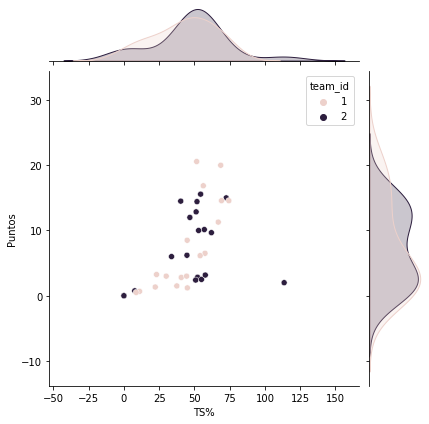



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
USG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


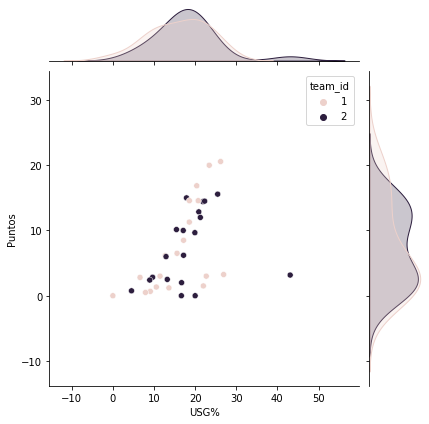



milwaukee bucks Es el team_id = 1
team_2: 1 victorias
team_1: 6 victorias
DREB%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


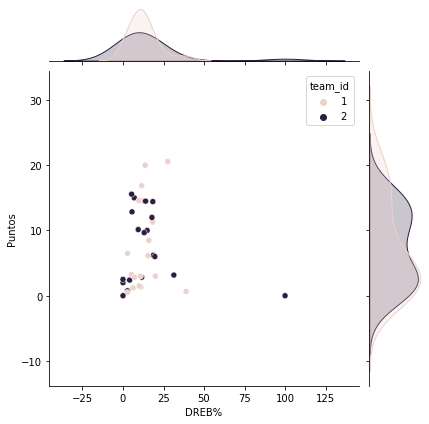

In [227]:
variables_scatter_avanzadas=["OFFRTG",  'DEFRTG', 'AST%', 'AST/TO', 'EFG%', 'TS%', 'USG%', 'DREB%']

for i in variables_scatter_avanzadas:
    print(result_avanzadas[0][0][0], "Es el team_id = 1")
    print("team_2: 1 victorias")
    print("team_1: 6 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_avanzados[1][i], dfs_avanzados[1]["Puntos"], hue=dfs_avanzados[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## DAL vs LAC

In [228]:
lista_dfs_avanzadas=[]
result_avanzadas=[]
city_a="DAL"
city_b="LAC"
inicio_temporada="2020-12-22"
result_avanzadas = df_equipos_avanzadas(city_a, city_b, inicio_temporada )
dfs_avanzados = procesamiento_avanzadas()

datos_tradicional=[]
lista_dfs=[]
city_a="DAL"
city_b="LAC"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

# Agregar pts a estadísticas avanzadas
dfs_avanzados[1]["Puntos"]=dfs_tradicionales[1]["PTS"].values

<ipython-input-221-8b9da228636e>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_avanzadas["PLAYER"][i] = (df2_avanzadas["PLAYER"][i][:-1])
<ipython-input-204-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
OFFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


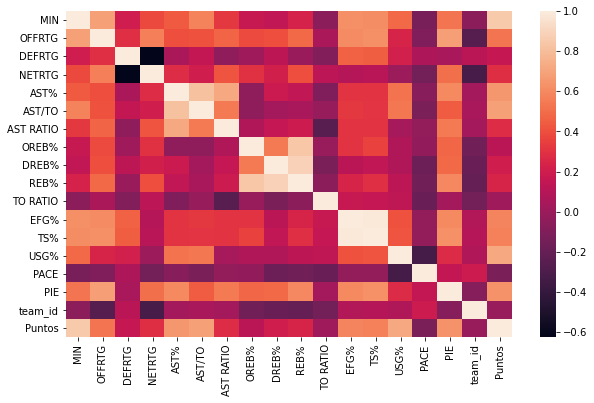

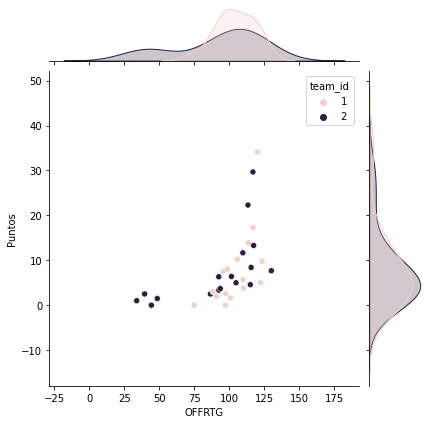



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
DEFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


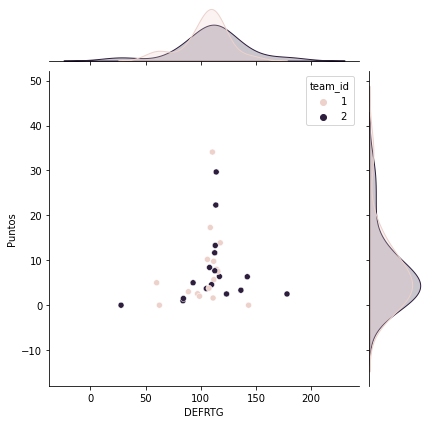



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
AST%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


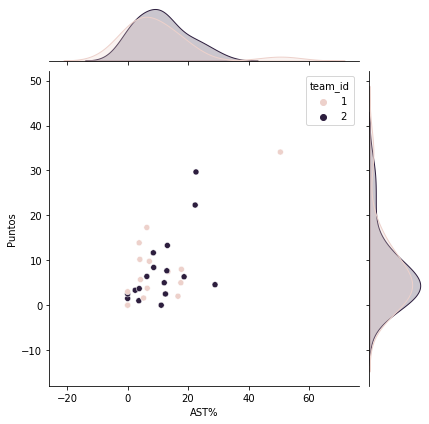



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
AST/TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


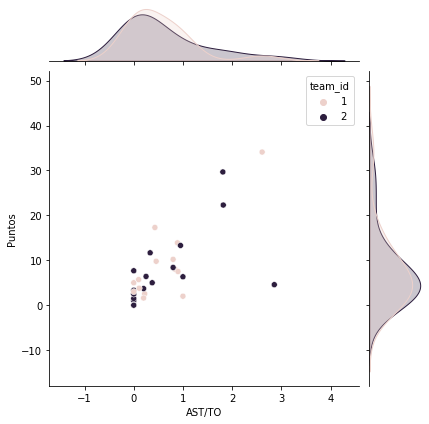



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
EFG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


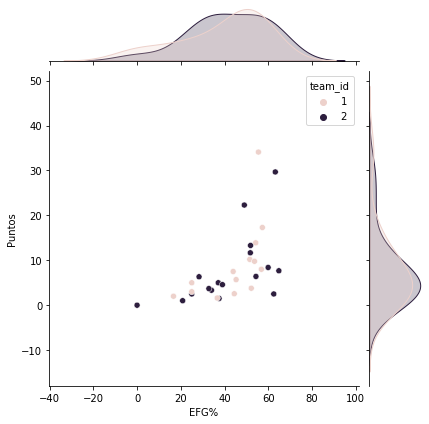



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
TS%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


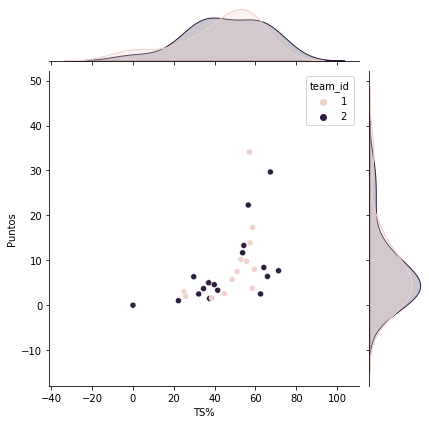



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
USG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


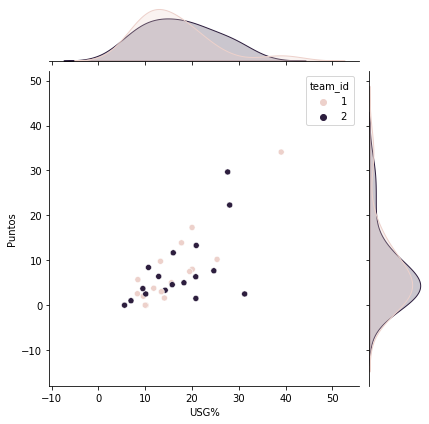



dallas mavericks Es el team_id = 1
team_2: 5 victorias
team_1: 5 victorias
DREB%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


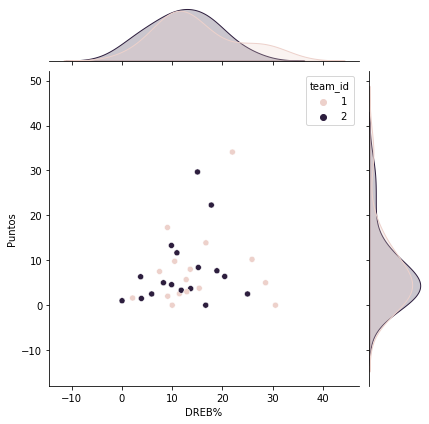

In [230]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_avanzados[1].corr())

variables_scatter_avanzadas=["OFFRTG",  'DEFRTG', 'AST%', 'AST/TO', 'EFG%', 'TS%', 'USG%', 'DREB%']

for i in variables_scatter_avanzadas:
    print(result_avanzadas[0][0][0], "Es el team_id = 1")
    print("team_2: 5 victorias")
    print("team_1: 5 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_avanzados[1][i], dfs_avanzados[1]["Puntos"], hue=dfs_avanzados[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## PHI vs ATL

In [236]:
lista_dfs_avanzadas=[]
result_avanzadas=[]
city_a="PHI"
city_b="ATL"
inicio_temporada="2020-12-22"
result_avanzadas = df_equipos_avanzadas(city_a, city_b, inicio_temporada )
dfs_avanzados = procesamiento_avanzadas()

datos_tradicional=[]
lista_dfs=[]
city_a="PHI"
city_b="ATL"
inicio_temporada="2020-12-22"
datos_tradicional = df_equipos(city_a, city_b, inicio_temporada)
dfs_tradicionales = procesamiento_tradicional()

# Agregar pts a estadísticas avanzadas
dfs_avanzados[1]["Puntos"]=dfs_tradicionales[1]["PTS"].values

<ipython-input-221-8b9da228636e>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_avanzadas["PLAYER"][i] = (df2_avanzadas["PLAYER"][i][:-1])
<ipython-input-204-549c388a2c12>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["PLAYER"][i] = (df2["PLAYER"][i][:-1])


atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
OFFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


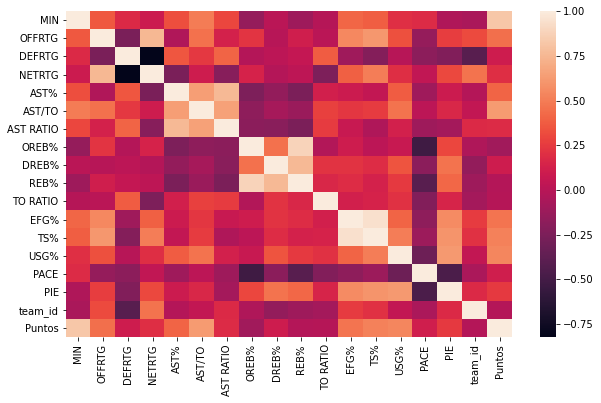

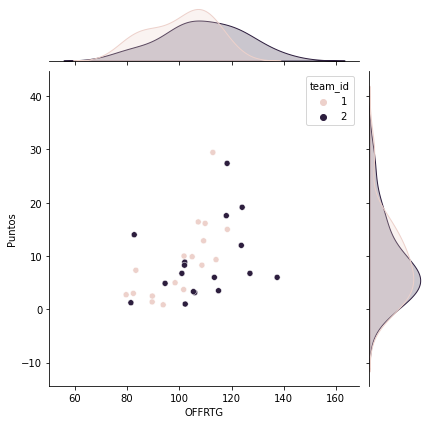



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
DEFRTG  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


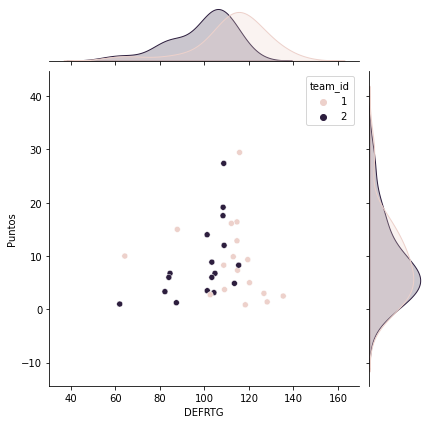



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
AST%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


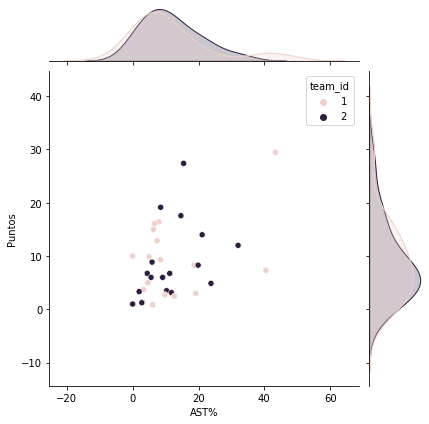



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
AST/TO  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


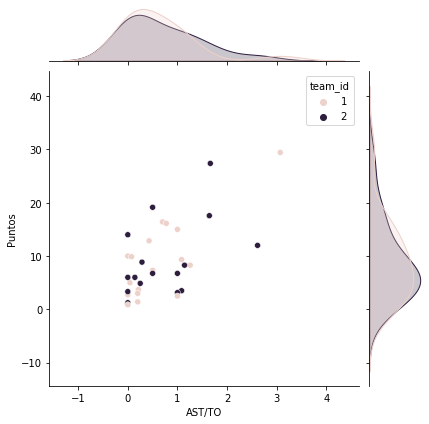



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
EFG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


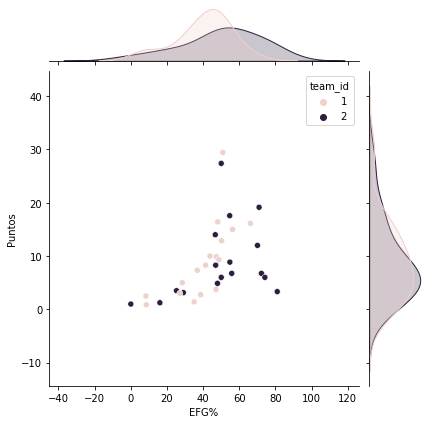



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
TS%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


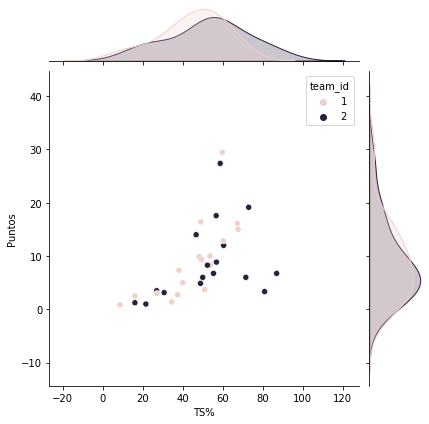



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
USG%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


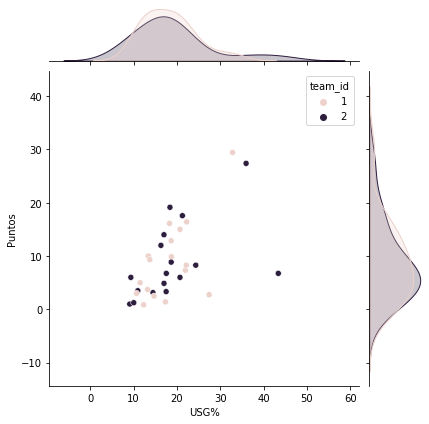



atlanta hawks Es el team_id = 1
team_2: 4 victorias
team_1: 4 victorias
DREB%  vs  PTS


C:\Users\leona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


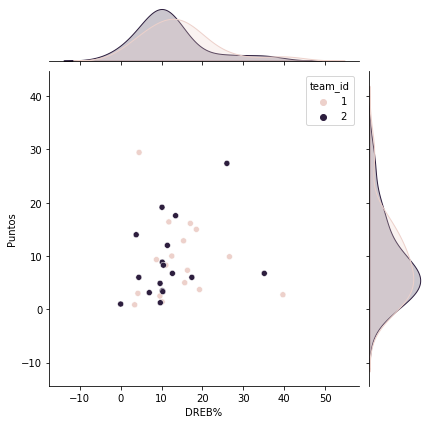

In [238]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dfs_avanzados[1].corr())

variables_scatter_avanzadas=["OFFRTG",  'DEFRTG', 'AST%', 'AST/TO', 'EFG%', 'TS%', 'USG%', 'DREB%']

for i in variables_scatter_avanzadas:
    print(result_avanzadas[0][0][0], "Es el team_id = 1")
    print("team_2: 4 victorias")
    print("team_1: 4 victorias")
    print(i," vs ", "PTS")
    sns.jointplot(dfs_avanzados[1][i], dfs_avanzados[1]["Puntos"], hue=dfs_avanzados[1]["team_id"]) #Scatter plot
    plt.show()
    print("\n")

## Conclusiones estadísticas avanzadas:
- El rating ofensivo, TS, FG%, AST / To, tiros intentados tienen relación directa con la cantidad de puntos.
- Los equipos con mayor rating defensivo tienden a hacer menos puntos
- Aparentemente las variables avanzadas de atque definen mejor los equipos.


# Preparación del df con todos los partidos de la temporada

# Contruir lista de combinaciones

#### En combinaciones_games se guardan los equipos de los partidos de la temporada

In [241]:
a=["ATL", "BOS", "CLE", "NOP", "CHI", "DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MIA", "MIL", "MIN", "BKN", "NYK", "ORL", "IND",
"PHI", "PHX", "POR", "SAC", "SAS", "OKC", "TOR", "UTA", "MEM", "WAS", "DET", "CHA"]
combinaciones_games=[]
for i in itertools.combinations(a,2):
    combinaciones_games.append(i)
len(combinaciones_games)

435

In [244]:
435*5

2175

### HAcer data frame de todos los partidos de la temporada, resumiendo las características por:
- minimo
- maximo
- media
- mediana
- std
- suma

### HAcer data frame de todos los partidos de la temporada sin resumir características, agregando un id de partido